1. What is Boosting in Machine Learning? Explain how it improves weak
learners

Ans- Boosting is a sequential ensemble method that converts multiple weak learners (models slightly better than random guessing) into one strong learner.

How it Improves Weak Learners
Sequential Correction: Models are trained one by one; each new model focuses on the samples the previous ones got wrong.

Sample Weighting: Misclassified data points are assigned higher weights, forcing the next model to prioritize them.

Residual Learning: In Gradient Boosting, new models are trained to predict the residuals (errors) of the previous models.

Bias Reduction: By iteratively minimizing errors, it reduces the overall bias of the ensemble.

2.What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained

Ans- **Error Correction:**

AdaBoost: Increases the weights of misclassified data points so the next model focuses on them.

Gradient Boosting: Predicts the residuals (the difference between actual and predicted values) of the previous models.

**Model Building:**

AdaBoost: Typically uses "stumps" (Decision Trees with only one split/level).

Gradient Boosting: Uses deeper, more complex trees (though still relatively shallow).

**Optimization Goal:**

AdaBoost: Minimizes an exponential loss function by adjusting sample importance.

Gradient Boosting: Uses Gradient Descent to minimize a differentiable loss function (like Mean Squared Error or Log Loss).

**Weighting of Models:**

AdaBoost: Each model is assigned a specific "stage weight" based on its accuracy; better models have more say.

Gradient Boosting: All models are usually scaled by a constant learning rate (7$\eta$) to slowly converge toward the solution.

3. How does regularization help in XGBoost

Ans- Regularization in XGBoost prevents overfitting by penalizing complex models. Unlike standard Gradient Boosting, XGBoost includes regularization terms directly in its objective function.

Objective Function: XGBoost minimizes 2$Obj = L(\theta) + \Omega(\theta)$, where 3$L$ is the loss function and 4$\Omega$ is the regularization term.

L1 Regularization (Alpha): Encourages sparsity by pushing some feature weights to zero.Useful for feature selection in high-dimensional data.

L2 Regularization (Lambda): Penalizes large weights, smoothing the model to make it less sensitive to individual data points (lowers variance).

Tree Complexity: It limits growth using hyperparameters like gamma (minimum loss reduction to split) and max_depth.

Shrinkage (Learning Rate): Scales the contribution of each new tree, forcing the model to learn more robust, generalized patterns rather than noise.

4. Why is CatBoost considered efficient for handling categorical data

Ans- CatBoost is efficient because it processes categorical variables natively without requiring manual preprocessing like One-Hot Encoding

Ordered Boosting: It uses a permutation-based approach to calculate leaf values, which prevents target leakage and reduces overfitting.

Symmetric Trees: It builds balanced trees where the same split is used at each level. This makes the model extremely fast during inference.

Target Encoding: It uses "Modified Target Encoding" to convert categories into numerical values based on historical data, adding a prior to maintain stability.

Categorical Combinations: It automatically creates new features by combining existing categorical variables that appear together frequently.

5. What are some real-world applications where boosting techniques are
preferred over bagging methods

Ans- Boosting is preferred in high-stakes scenarios where maximizing accuracy and minimizing bias are more critical than computational speed or avoiding noise

**1. Financial Fraud Detection**

Application: Identifying fraudulent transactions or insurance claims.

Why Boosting: Fraud cases are "needles in a haystack" (imbalanced data). Boosting (e.g., XGBoost) iteratively focuses on these rare, difficult-to-detect cases that Bagging might overlook.

**2. Ad Click-Through Rate (CTR) Prediction**

Application: Predicting whether a user will click a specific digital advertisement.

Why Boosting: User behavior involves complex, non-linear patterns. Gradient Boosting effectively captures these subtle interactions between thousands of sparse features (like user history and time of day).

**3. Healthcare & Medical Diagnosis**

Application: Predicting the survival rate of cancer patients or diagnosing chronic diseases (e.g., cardiovascular risk).

Why Boosting: Medical decisions require high precision. Sequential refinement allows models to correct for specific patient subgroups that standard "averaged" models (Bagging) might misclassify.

**4. Search Engine Ranking**

Application: Ordering millions of web pages by relevance to a query.

Why Boosting: Search engines use "Ranking SVMs" or Boosted Trees to learn the exact nuance of why one page is slightly better than another.

**5. Energy Demand Forecasting**

Application: Predicting hourly electricity consumption for power grids.

Why Boosting: Energy consumption has strong seasonal and trend-based biases. Boosting excels at "fitting" these underlying trends more aggressively than Bagging

6. Write a Python program to:

Train an AdaBoost Classifier on the Breast Cancer dataset

Print the model accuracy

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# 2. Train AdaBoost
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# 3. Evaluate
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.9649


7. Write a Python program to:

Train a Gradient Boosting Regressor on the California Housing dataset

Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Load data
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# 2. Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# 3. Evaluate using R-squared
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")

Gradient Boosting Regressor R-squared Score: 0.7756


8. Write a Python program to:

Train an XGBoost Classifier on the Breast Cancer dataset

Tune the learning rate using GridSearchCV

Print the best parameters and accuracy

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier # Using GBC as a built-in alternative
from sklearn.metrics import accuracy_score

# 1. Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# 2. Setup Gradient Boosting (XGBoost logic) and GridSearch
model = GradientBoostingClassifier(random_state=42)
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 3. Print Results
best_params = grid_search.best_params_
accuracy = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))

print(f"Best Parameters: {best_params}")
print(f"Final Accuracy: {accuracy:.4f}")

Best Parameters: {'learning_rate': 0.2}
Final Accuracy: 0.9561


9.  Write a Python program to:

Train a CatBoost Classifier

Plot the confusion matrix using seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


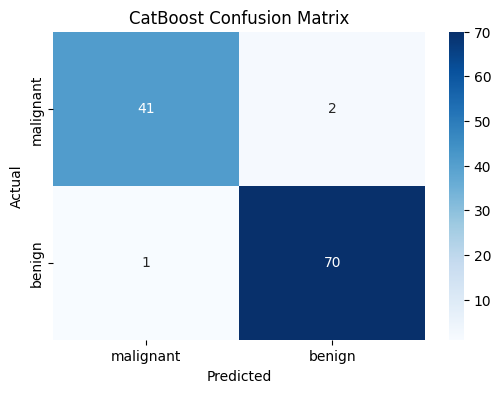

In [5]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# 2. Train CatBoost (silent=True to avoid log wall)
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, silent=True)
model.fit(X_train, y_train)

# 3. Predict and Create Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# 4. Plot using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()

10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.

The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:


Data preprocessing & handling missing/categorical values

Choice between AdaBoost, XGBoost, or CatBoost

Hyperparameter tuning strategy

Evaluation metrics you'd choose and why

How the business would benefit from your model

**1. Data Preprocessing**

Missing Values: For boosting, use internal handling. XGBoost and CatBoost automatically learn the best direction for missing values during splitting.

Categorical Features: Use CatBoost to handle them natively via its internal target encoding, or use One-Hot Encoding for low-cardinality and Target Encoding for high-cardinality features if using XGBoost.

Scaling: No feature scaling (like Min-Max) is required as tree-based boosting is scale-invariant.

**2. Choice of Algorithm: CatBoost**

Decision: CatBoost is the best choice here.

Reason: It handles categorical data natively without manual encoding, reduces overfitting through "Ordered Boosting," and manages imbalanced data well using the class_weights parameter.

**3. Hyperparameter Tuning Strategy**

Method: Use Bayesian Optimization (e.g., Optuna) instead of GridSearch for faster convergence in high-dimensional spaces.

Key Params: Tune learning_rate (shrinkage), depth (complexity), l2_leaf_reg (regularization), and iterations (number of trees).

Early Stopping: Use a validation set to stop training when the error plateaus to prevent overfitting.

**4. Evaluation Metrics**

Primary Metric: Precision-Recall AUC (PR-AUC).

Reason: Since loan defaults are rare (imbalanced), accuracy is misleading. PR-AUC focuses on the model's ability to catch defaults (Recall) without flagging too many safe customers (Precision).

Secondary Metric: F1-Score to balance the trade-off between risk and lost opportunity.

**5. Business Benefits**

Reduced Loss: Accurately identifying high-risk applicants directly lowers the Default Rate.

Automation: Speeds up the loan approval process, improving the customer experience.

Explainability: Using SHAP values allows the company to explain why a loan was rejected (e.g., "High debt-to-income ratio"), meeting regulatory requirements.